In [1]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.applications.vgg16 import decode_predictions
from tensorflow.keras.applications.vgg16 import VGG16

In [2]:
model = VGG16()

In [3]:
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [4]:
# load an image from file
image = load_img('mug.jpg', target_size=(224, 224))

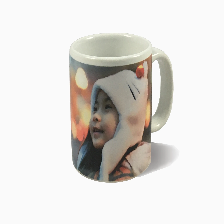

In [5]:
image

In [6]:
# convert the image pixels to a numpy array
image = img_to_array(image)

In [7]:
image

array([[[250., 250., 250.],
        [250., 250., 250.],
        [250., 250., 250.],
        ...,
        [250., 250., 250.],
        [250., 250., 250.],
        [250., 250., 250.]],

       [[250., 250., 250.],
        [250., 250., 250.],
        [250., 250., 250.],
        ...,
        [250., 250., 250.],
        [250., 250., 250.],
        [250., 250., 250.]],

       [[250., 250., 250.],
        [250., 250., 250.],
        [250., 250., 250.],
        ...,
        [250., 250., 250.],
        [250., 250., 250.],
        [250., 250., 250.]],

       ...,

       [[250., 250., 250.],
        [250., 250., 250.],
        [250., 250., 250.],
        ...,
        [250., 250., 250.],
        [250., 250., 250.],
        [250., 250., 250.]],

       [[250., 250., 250.],
        [250., 250., 250.],
        [250., 250., 250.],
        ...,
        [250., 250., 250.],
        [250., 250., 250.],
        [250., 250., 250.]],

       [[250., 250., 250.],
        [250., 250., 250.],
        [250., 2

In [8]:
image.shape

(224, 224, 3)

In [9]:
# The network expects one or more images as input ,that means the input array will need to be
# 4 dimentional: (samples,rows,columns,channels)

In [10]:
# reshape data for the model
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))

In [11]:
image.shape

(1, 224, 224, 3)

In [12]:
# prepare the image for the VGG model
image = preprocess_input(image)

In [13]:
image

array([[[[146.061  , 133.22101, 126.32   ],
         [146.061  , 133.22101, 126.32   ],
         [146.061  , 133.22101, 126.32   ],
         ...,
         [146.061  , 133.22101, 126.32   ],
         [146.061  , 133.22101, 126.32   ],
         [146.061  , 133.22101, 126.32   ]],

        [[146.061  , 133.22101, 126.32   ],
         [146.061  , 133.22101, 126.32   ],
         [146.061  , 133.22101, 126.32   ],
         ...,
         [146.061  , 133.22101, 126.32   ],
         [146.061  , 133.22101, 126.32   ],
         [146.061  , 133.22101, 126.32   ]],

        [[146.061  , 133.22101, 126.32   ],
         [146.061  , 133.22101, 126.32   ],
         [146.061  , 133.22101, 126.32   ],
         ...,
         [146.061  , 133.22101, 126.32   ],
         [146.061  , 133.22101, 126.32   ],
         [146.061  , 133.22101, 126.32   ]],

        ...,

        [[146.061  , 133.22101, 126.32   ],
         [146.061  , 133.22101, 126.32   ],
         [146.061  , 133.22101, 126.32   ],
         ...,


In [14]:
# predict the probability across all output classes
yhat = model.predict(image)

In [15]:
yhat

array([[6.14482929e-07, 2.17265821e-07, 1.64312635e-08, 3.99788931e-08,
        1.12367651e-07, 1.68975546e-07, 2.76100316e-08, 4.40044971e-07,
        5.04126319e-07, 3.70472321e-07, 4.45644986e-07, 1.77016227e-06,
        1.56086855e-06, 1.79134872e-07, 1.35950279e-06, 3.77842667e-07,
        1.46961418e-06, 5.93603943e-07, 7.23226947e-07, 1.44132116e-06,
        3.99088798e-08, 1.10239614e-06, 6.17318733e-07, 4.58555945e-07,
        2.68054265e-07, 7.11450980e-07, 4.16951309e-07, 3.66323343e-06,
        1.40910697e-06, 1.91953234e-07, 2.05998219e-07, 2.07443986e-06,
        6.51520679e-07, 1.22652693e-07, 6.48695035e-08, 2.25159738e-07,
        1.14591110e-07, 1.26552862e-07, 3.01904493e-07, 1.35465527e-07,
        1.78223729e-07, 9.72953487e-08, 3.56318139e-07, 5.62124399e-07,
        5.47482387e-07, 5.29112583e-07, 4.15682820e-07, 1.56199661e-07,
        6.27110381e-08, 9.63920073e-08, 2.40519213e-08, 3.03282434e-07,
        4.32828529e-06, 8.40669145e-06, 5.11562519e-07, 1.478309

In [16]:
# convert the probabilities to class labels
label = decode_predictions(yhat)

In [17]:
label

[[('n03063599', 'coffee_mug', 0.8397522),
  ('n07930864', 'cup', 0.1019005),
  ('n03950228', 'pitcher', 0.0116317505),
  ('n03937543', 'pill_bottle', 0.01013089),
  ('n04560804', 'water_jug', 0.0045696734)]]

In [18]:
# retrieve the most likely result, e.g. highest probability
label = label[0][0]

In [19]:
label

('n03063599', 'coffee_mug', 0.8397522)

In [20]:
# print the classification

In [21]:
print('%s (%.2f%%)' % (label[1], label[2]*100))

coffee_mug (83.98%)
